In [29]:
import numpy as np
from tqdm import tqdm

# 1. Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi, першi двi координати мають показниковий розподiл з параметром 1, третя координата має стандартний нормальний розподiл.

In [30]:
def generate_random_vectors(N):
    # Перші дві координати: показниковий (експоненційний) розподіл з параметром λ=1
    first_two_coords = np.random.exponential(scale=1, size=(N, 2))
    # Третя координата: стандартний нормальний розподіл
    third_coord = np.random.normal(loc=0, scale=1, size=(N, 1))
    # Об'єднання координат
    vectors = np.hstack((first_two_coords, third_coord))
    return vectors

In [31]:
num_vectors_ = 250 # кількість векторів
vectors_ = generate_random_vectors(num_vectors_)

# 2. Реалiзувати алгоритм Козинця пошуку роздiляючого вектора для опуклої оболонки згенерованих векторiв. Алгоритм має працювати для довiльного N.

In [32]:
def kozinec_algorithm(vectors):
    """
    Реалізує алгоритм Козинця для пошуку розділяючого вектора.
    """
    n = len(vectors)
    separating_vector = None

    for i in tqdm(range(n)):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                # Беремо три вектори
                p1, p2, p3 = vectors[i], vectors[j], vectors[k]
                # Знаходимо нормаль до площини, утвореної трьома векторами
                normal = np.cross(p2 - p1, p3 - p1)
                if np.linalg.norm(normal) == 0:
                    continue  # Вектори лежать на одній лінії

                # Перевіряємо, чи всі точки знаходяться по один бік від площини
                positive_side = None
                is_separating = True

                for vec in vectors:
                    if np.array_equal(vec, p1) or np.array_equal(vec, p2) or np.array_equal(vec, p3):
                        continue

                    # Обчислюємо скалярний добуток нормалі на вектор
                    side = np.dot(normal, vec - p1)

                    if positive_side is None:
                        positive_side = side > 0
                    elif (side > 0) != positive_side:
                        is_separating = False
                        break

                if is_separating:
                    separating_vector = normal
                    break

            if separating_vector is not None:
                break
        if separating_vector is not None:
            break

    return separating_vector

In [33]:
separating_vector_ = kozinec_algorithm(vectors_)

if separating_vector_ is not None:
    print("Розділяючий вектор знайдено:", separating_vector_)
else:
    print("Розділяючий вектор не знайдено.")

  2%|█▎                                                                                | 4/250 [00:09<10:03,  2.46s/it]

Розділяючий вектор знайдено: [-2.94709987 -7.21653995  0.47999297]


In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize_vectors_and_separator(vectors_, separating_vector_):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vectors_[:, 0], vectors_[:, 1], vectors_[:, 2], c='green', marker='o', label='Незалежні випадкові вектори')
    if separating_vector_ is not None:
        # Візуалізація розділяючого вектора
        origin = [0, 0, 0]  # Початок координат
        ax.quiver(*origin, *separating_vector_, color='blue', label='Розділяючий вектор', linewidth=1)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
    plt.show()

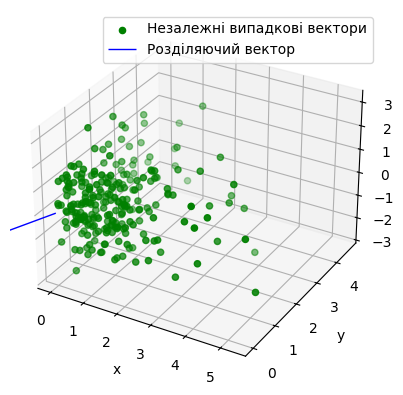

In [35]:
visualize_vectors_and_separator(vectors_, separating_vector_)